<div class="alert alert-block alert-success">
        <h3 align="center">Random Forest - Loan Dataset</h3>
        <h3 align="center">Fariborz Dolafi</h3>

</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## load dataset

In [2]:
data=pd.read_csv('Loan.csv')


In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Check for missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<div class="alert alert-block alert-info">
        <h3 align="center">Data Preprocessing</h3>
</div>

## Encoding Data

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Label Encoding

data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Dependents'].replace('3+',3,inplace=True)
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


## Missing Value

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

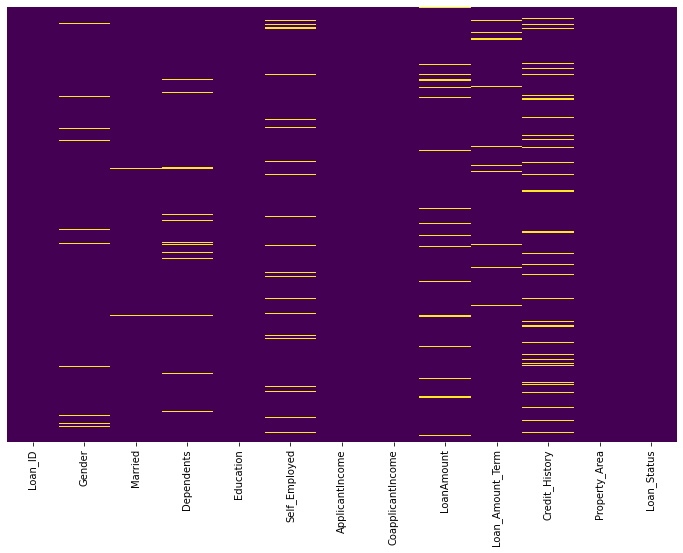

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [12]:
re_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
data[re_null]=data[re_null].replace({np.nan:data['Gender'].mode(),
                                   np.nan:data['Married'].mode(),
                                   np.nan:data['Dependents'].mode(),
                                   np.nan:data['Self_Employed'].mode(),
                                   np.nan:data['Credit_History'].mode(),
                                   np.nan:data['LoanAmount'].mean(),
                                   np.nan:data['Loan_Amount_Term'].mean()})

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

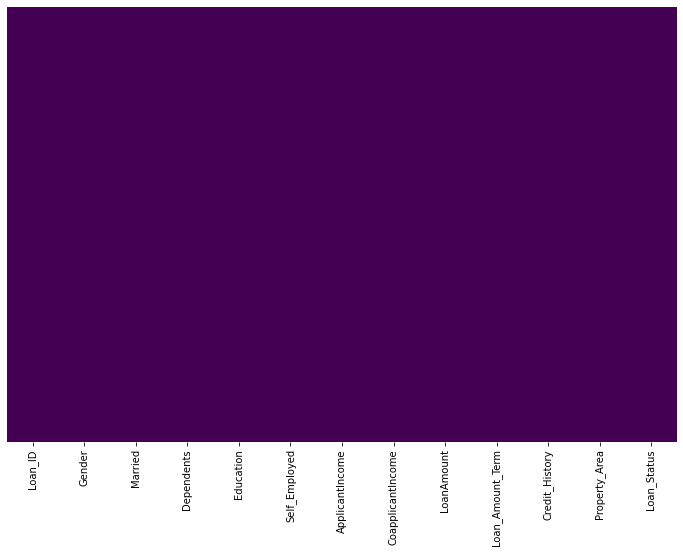

In [17]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


<div class="alert alert-block alert-warning">
    <h3 align="center">Random Forest Classification</h3>
</div>

## Train and Test 

In [14]:
X=data.drop(columns=['Loan_ID','Loan_Status']).values
y=data['Loan_Status'].values

## Train-Test Split 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,342.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
X_train

array([[1.0, 1.0, '0', ..., 360.0, 1.0, 1],
       [1.0, 0.0, '1', ..., 360.0, 342.0, 1],
       [1.0, 1.0, '0', ..., 360.0, 0.0, 3],
       ...,
       [1.0, 1.0, 3, ..., 360.0, 1.0, 1],
       [1.0, 1.0, '0', ..., 360.0, 1.0, 2],
       [0.0, 1.0, '0', ..., 360.0, 1.0, 1]], dtype=object)

In [18]:
X_test

array([[1.0, 0.0, '0', ..., 360.0, 1.0, 1],
       [0.0, 0.0, '0', ..., 360.0, 1.0, 1],
       [1.0, 1.0, '0', ..., 360.0, 1.0, 2],
       ...,
       [1.0, 1.0, '0', ..., 360.0, 1.0, 1],
       [1.0, 1.0, 3, ..., 180.0, 0.0, 2],
       [1.0, 1.0, '1', ..., 360.0, 1.0, 2]], dtype=object)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.15470824, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.30012524, -1.12502005],
       [-0.15470824, -0.10327338, -0.17402212, ...,  0.27644707,
         3.31292262, -1.12502005],
       [-0.15470824, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.31072069,  1.33549151],
       ...,
       [-0.15470824, -0.06568462, -0.13996678, ...,  0.27644707,
        -0.30012524, -1.12502005],
       [-0.15470824, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.30012524,  0.10523573],
       [-0.17368919, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.30012524, -1.12502005]])

In [21]:
X_test

array([[-0.15470824, -0.10327338, -0.19104979, ...,  0.27644707,
        -0.30012524, -1.12502005],
       [-0.17368919, -0.10327338, -0.19104979, ...,  0.27644707,
        -0.30012524, -1.12502005],
       [-0.15470824, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.30012524,  0.10523573],
       ...,
       [-0.15470824, -0.06568462, -0.19104979, ...,  0.27644707,
        -0.30012524, -1.12502005],
       [-0.15470824, -0.06568462, -0.13996678, ..., -2.57314376,
        -0.31072069,  0.10523573],
       [-0.15470824, -0.06568462, -0.17402212, ...,  0.27644707,
        -0.30012524,  0.10523573]])

## Random Forest model

In [22]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


## Predicting a new result

In [23]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8526315789473685


## Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, rfc_pred_test)
print(cm)

accuracy = accuracy_score(y_test, rfc_pred_test) * 100
print("Accuracy of Model: ",accuracy)

[[14 19]
 [ 9 81]]
Accuracy of Model:  77.23577235772358


<AxesSubplot:xlabel='predicted', ylabel='actual'>

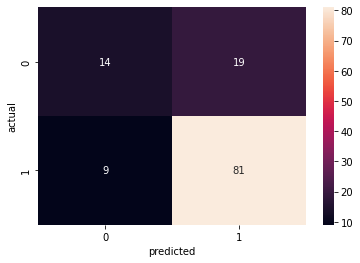

In [25]:
# confusion matrix

ct = pd.crosstab(y_test, rfc_pred_test, rownames=['actual'], colnames=['predicted'])
sns.heatmap(ct, annot=True)

In [26]:
from sklearn.metrics import classification_report

creport =classification_report(y_test,rfc_pred_test)
print("Classification Report")
print(creport)


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.81      0.90      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.76      0.77      0.76       123



## Feature Importance

In [27]:
rfc.feature_importances_

array([0.02434307, 0.0232547 , 0.0596263 , 0.02549197, 0.03067605,
       0.20309258, 0.11590129, 0.18807228, 0.04078318, 0.23777825,
       0.05098033])

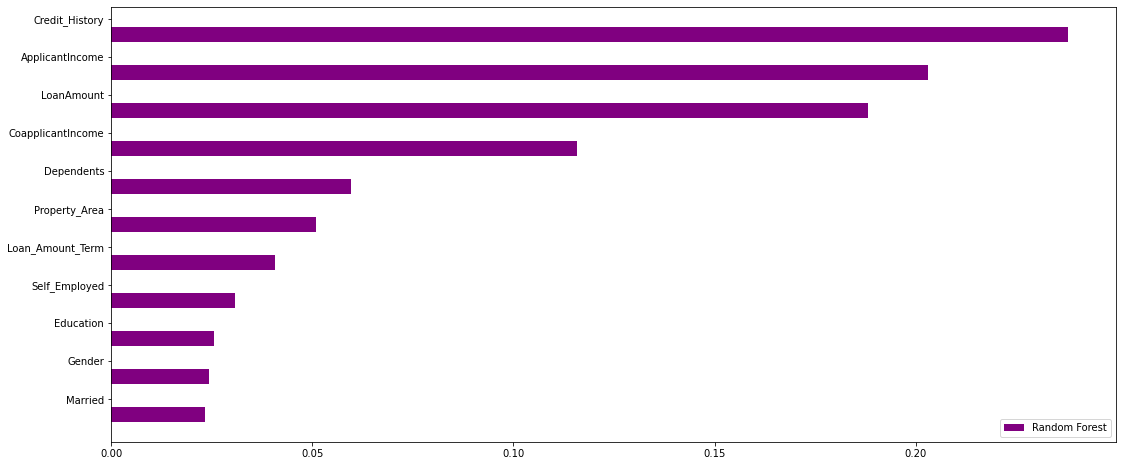

In [28]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=data.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()